In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
%matplotlib inline

In [ ]:
solid_waste = pd.read_pickle("solid_waste.pkl")
renewable_energy = pd.read_pickle("renewable_energy.pkl")
petroleum_release = pd.read_pickle("petroleum_release.pkl")
pollution_reports = pd.read_pickle("pollution_reports.pkl")

In [ ]:
va_towns = pd.read_csv("VirginiaTownList.csv")

In [ ]:
solid_waste.head()

,FAC_NAME,FAC_LOCATION,LSWPU_NAME,Full_Address,Minimal_Address,latitude,longitude
0,Lorton Construction Landfill,10001 Furnace Rd - Route 611,Fairfax County,"10001 Furnace Rd,Lorton,VA,United States","Lorton,VA,United States",38.691227,-77.237497
1,Loudoun Composting,Rte 50 W to Pleasant Valley Rd to Wade Dr,Loudoun County,"44150 Wade Dr,Chantilly,VA,United States","Chantilly,VA,United States",38.878836,-77.402217
7,LCM Corp - Transfer Station,NaN,City of Roanoke,"3321 Shenandoah Ave NW,Roanoke,VA,United States","Roanoke,VA,United States",37.282037,-79.990535
22,Kaiser Permanente - Woodbridge,14139 Potomac Mills Rd,Prince Wiliam County,"14139 Potomac Mills Rd,Woodbridge,VA,United St...","Woodbridge,VA,United States",38.638492,-77.293860
26,Canon Environmental Technologies Incorporated,6000 Industrial Drive,Gloucester County,"6000 Industrial Drive,Gloucester,VA,United States","Gloucester,VA,United States",37.368687,-76.533821


In [ ]:
renewable_energy.head()

,PERM_NAME,PTC_DESCRIPTION,COUNTY,Minimal_Address,latitude,longitude
1,"Greenwood Solar I, LLC",Solar,Culpeper County,"Culpeper County,VA,United States",38.491221,-77.961822
2,"Sweetspire, LLC",Solar,Hanover County,"Hanover County,VA,United States",37.744783,-77.446416
3,"KDC Solar Kings Creek, LLC",Solar,James City County,"James City County,VA,United States",37.321148,-76.797252
7,"Eastern Shore Solar, LLC",Solar,Accomack County,"Accomack County,VA,United States",37.742221,-75.674354
8,Carvers Creek Solar,Solar,Gloucester County,"Gloucester County,VA,United States",37.445229,-76.559448


In [ ]:
petroleum_release.head()

,RST_NAME,FIC_DESCRIPTION,Full_Address,Minimal_Address,latitude,longitude
0,BURLINGTON INDUSTRIES INC,Campbell County,"401 Amherst Ave,Altavista,VA,United States","Altavista,VA,United States",37.096675,-79.309638
1,Recreation Parks 506,Richmond City,"810 Forest Lawn Rd,Richmond,VA,United States","Richmond,VA,United States",37.597821,-77.446067
2,Chasens Business Interiors,Richmond City,"2924 W Marshall St,Richmond,VA,United States","Richmond,VA,United States",37.564380,-77.470984
3,Wiggins Residence,Henrico County,"3104 Skelton St,Richmond,VA,United States","Richmond,VA,United States",37.576630,-77.385257
4,Cabin Hill Farm,Hanover County,"7423 Normans Bridge Rd,Hanover,VA,United States","Hanover,VA,United States",37.775555,-77.360211


In [ ]:
pollution_reports.rename(columns={"LAT": "latitude", "LON": "longitude"}, inplace=True)
pollution_reports.head()

,FULL_ADDRESS,MIN_ADDRESS,latitude,longitude
0,"2035 Sunset Maple Ln,Chesapeake,VA,United States","Chesapeake,VA,United States",36.723637,-76.322875
2,"608 Franklin St,Harrisonburg,VA,United States","Harrisonburg,VA,United States",38.446588,-78.857298
3,"102 Polk Street,Lynchburg,VA,United States","Lynchburg,VA,United States",37.417206,-79.155264
6,"210 Emmet Street South,Charlottesville,VA,Unit...","Charlottesville,VA,United States",38.039740,-78.506712
13,"9324 Virginia ave.,NORFOLK,VA,United States","NORFOLK,VA,United States",36.937344,-76.321838


In [ ]:
va_towns.head()

,Town,latitude,longitude
0,Abingdon town,36.71,-81.97
1,Accomac town,37.72,-75.67
2,Adwolf,36.79,-81.59
3,Alberta town,36.86,-77.89
4,Alexandria city,38.82,-77.09


In [ ]:
import geopy.distance

# test distance between two coordinates
coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print(geopy.distance.vincenty(coords_1, coords_2).miles)

173.58184552455262


In [ ]:
def closest_solid_waste(lat, long, target_lats, target_longs):
    min_dist = 10000000
    location_coordinate = (lat, long)
    for target_coordinate in zip(target_lats, target_longs):
      min_dist = min(min_dist, geopy.distance.vincenty(location_coordinate, target_coordinate).miles)
    return min_dist

In [ ]:
va_towns["closest_solid_waste"] = va_towns.apply(lambda row: closest_solid_waste(row.latitude, row.longitude, solid_waste["latitude"], solid_waste["longitude"]), axis=1)

In [ ]:
va_towns["closest_renewable_energy"] = va_towns.apply(lambda row: closest_solid_waste(row.latitude, row.longitude, renewable_energy["latitude"], renewable_energy["longitude"]), axis=1)

In [ ]:
va_towns["closest_petroleum_release"] = va_towns.apply(lambda row: closest_solid_waste(row.latitude, row.longitude, petroleum_release["latitude"], petroleum_release["longitude"]), axis=1)

In [ ]:
va_towns["closest_pollution_reports"] = va_towns.apply(lambda row: closest_solid_waste(row.latitude, row.longitude, pollution_reports["latitude"], pollution_reports["longitude"]), axis=1)

In [ ]:
va_towns.head()

,Town,latitude,longitude,closest_solid_waste,closest_renewable_energy,closest_petroleum_release,closest_pollution_reports
0,Abingdon town,36.71,-81.97,0.294818,52.129728,0.042871,0.460100
1,Accomac town,37.72,-75.67,6.249408,1.550936,0.015395,0.058127
2,Adwolf,36.79,-81.59,5.154079,30.339459,0.433561,4.275153
3,Alberta town,36.86,-77.89,6.861292,19.785872,0.339769,13.516906
4,Alexandria city,38.82,-77.09,0.811872,25.651648,0.133541,0.811872


In [ ]:
va_towns_clean = va_towns[va_towns["Town"] != "Chesterfield town"]

In [ ]:
va_towns_clean.to_pickle("town_closest_distances.pkl")

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42).fit(va_towns_clean[["closest_solid_waste", "closest_renewable_energy", "closest_petroleum_release"]])
va_towns_clean["cluster"] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


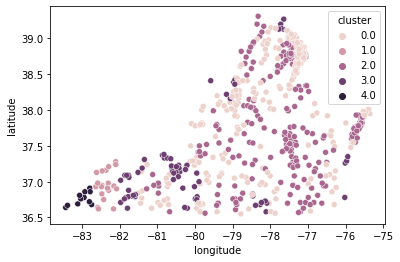

In [ ]:
sns.scatterplot(va_towns["longitude"], va_towns_clean["latitude"], hue=va_towns_clean["cluster"])

In [ ]:
va_towns_clean.groupby(["cluster"]).mean()

,latitude,longitude,closest_solid_waste,closest_renewable_energy,closest_petroleum_release,closest_pollution_reports
cluster,,,,,,
0,38.031504,-78.099098,4.393057,19.440336,0.384544,2.373683
1,36.951500,-82.370500,5.151241,73.680721,0.232808,2.708118
2,37.732262,-77.626199,5.392794,8.009026,0.405180,2.892820
3,37.306164,-79.862877,4.071125,33.737363,0.344145,3.510183
4,36.761818,-82.998182,15.095581,99.256782,0.420498,12.374671
